In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math


In [ ]:
pip install yfinance


In [ ]:
ticker = "DMART.BO"

In [ ]:
import yfinance as yf

In [ ]:
interval = "1d"
period = "2y"


In [ ]:
tickerdata = yf.download(ticker , interval = interval, period = period)

/tmp/ipython-input-70117961.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  tickerdata = yf.download(ticker , interval = interval, period = period)
[*********************100%***********************]  1 of 1 completed


In [ ]:
dmart_df = tickerdata.copy()

In [ ]:
dmart_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 491 entries, 2024-01-29 to 2026-01-27
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, DMART.BO)   491 non-null    float64
 1   (High, DMART.BO)    491 non-null    float64
 2   (Low, DMART.BO)     491 non-null    float64
 3   (Open, DMART.BO)    491 non-null    float64
 4   (Volume, DMART.BO)  491 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 23.0 KB


In [ ]:
dmart_df.columns

MultiIndex([( 'Close', 'DMART.BO'),
            (  'High', 'DMART.BO'),
            (   'Low', 'DMART.BO'),
            (  'Open', 'DMART.BO'),
            ('Volume', 'DMART.BO')],
           names=['Price', 'Ticker'])

In [ ]:
dmart_df

Price,Close,High,Low,Open,Volume
Ticker,DMART.BO,DMART.BO,DMART.BO,DMART.BO,DMART.BO
Date,,,,,
2024-01-29,3747.250000,3760.699951,3685.800049,3685.800049,8580
2024-01-30,3688.699951,3770.149902,3681.399902,3715.149902,5502
2024-01-31,3794.800049,3821.649902,3652.500000,3680.000000,35358
2024-02-01,3809.350098,3827.500000,3771.050049,3800.100098,23057
2024-02-02,3781.500000,3814.949951,3770.000000,3781.199951,19624
...,...,...,...,...,...
2026-01-20,3661.600098,3783.750000,3646.000000,3770.399902,9800
2026-01-21,3655.699951,3694.600098,3616.199951,3662.000000,20321


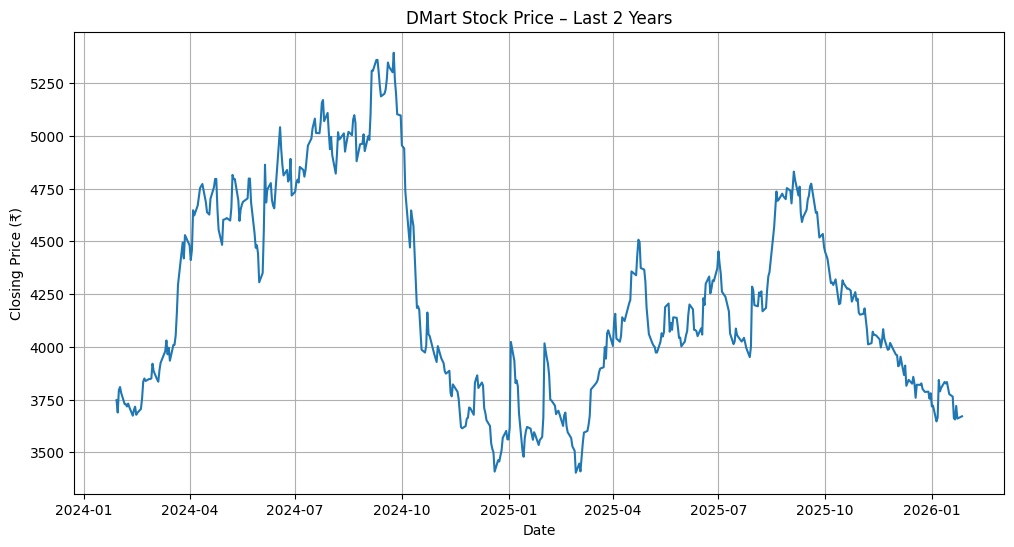

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure index is datetime
dmart_df.index = pd.to_datetime(dmart_df.index)

# Sort by date
dmart_df = dmart_df.sort_index()

# Filter last 2 years
end_date = dmart_df.index.max()
start_date = end_date - pd.DateOffset(years=2)

dmart_2y = dmart_df.loc[start_date:end_date]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dmart_2y.index, dmart_2y['Close'])
plt.xlabel('Date')
plt.ylabel('Closing Price (₹)')
plt.title('DMart Stock Price – Last 2 Years')
plt.grid(True)
plt.show()

In [ ]:
closepriceseries = dmart_df[['Close']]

In [ ]:
closepriceseries

Price,Close
Ticker,DMART.BO
Date,
2024-01-29,3747.250000
2024-01-30,3688.699951
2024-01-31,3794.800049
2024-02-01,3809.350098
2024-02-02,3781.500000
...,...
2026-01-20,3661.600098
2026-01-21,3655.699951


In [ ]:
simple_returns = closepriceseries.Close.pct_change().dropna()
simple_returns

Ticker,DMART.BO
Date,
2024-01-30,-0.015625
2024-01-31,0.028764
2024-02-01,0.003834
2024-02-02,-0.007311
2024-02-05,-0.014029
...,...
2026-01-20,-0.027257
2026-01-21,-0.001611
2026-01-22,0.017575


In [ ]:
closepriceseries['log_returns'] = np.log(closepriceseries).diff().dropna()

/tmp/ipython-input-2478881261.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closepriceseries['log_returns'] = np.log(closepriceseries).diff().dropna()


In [ ]:
closepriceseries.dropna()

Price,Close,log_returns
Ticker,DMART.BO,
Date,,
2024-01-30,3688.699951,-0.015748
2024-01-31,3794.800049,0.028358
2024-02-01,3809.350098,0.003827
2024-02-02,3781.500000,-0.007338
2024-02-05,3728.449951,-0.014128
...,...,...
2026-01-20,3661.600098,-0.027635
2026-01-21,3655.699951,-0.001613


In [ ]:
closepriceseries.columns = closepriceseries.columns.droplevel(1)

In [ ]:
closepriceseries.columns

Index(['Close', 'log_returns'], dtype='object', name='Price')

In [ ]:
closepriceseries["SMA_10"] = closepriceseries.Close.rolling(window=10, min_periods=1).mean()
closepriceseries["CMA"] = closepriceseries.Close.expanding().mean()
closepriceseries["EMA"]= closepriceseries.Close.ewm(span=10, adjust=False).mean()

/tmp/ipython-input-2423120777.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closepriceseries["SMA_10"] = closepriceseries.Close.rolling(window=10, min_periods=1).mean()
/tmp/ipython-input-2423120777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closepriceseries["CMA"] = closepriceseries.Close.expanding().mean()


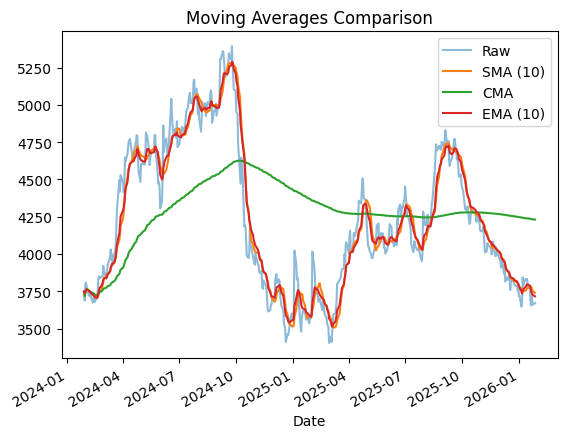

In [ ]:
ax = closepriceseries["Close"].plot(label="Raw", alpha=0.5)

closepriceseries["SMA_10"].plot(ax=ax, label="SMA (10)")
closepriceseries["CMA"].plot(ax=ax, label="CMA")
closepriceseries["EMA"].plot(ax=ax, label="EMA (10)")

plt.legend()
plt.title("Moving Averages Comparison")
plt.show()

In [ ]:
closepriceseries = closepriceseries.dropna()

In [ ]:
closepriceseries

Price,Close,log_returns,SMA_10,CMA,EMA
Date,,,,,
2024-01-30,3688.699951,-0.015748,3717.974976,3717.974976,3736.604537
2024-01-31,3794.800049,0.028358,3743.583333,3743.583333,3747.185539
2024-02-01,3809.350098,0.003827,3760.025024,3760.025024,3758.488186
2024-02-02,3781.500000,-0.007338,3764.320020,3764.320020,3762.672152
2024-02-05,3728.449951,-0.014128,3758.341675,3758.341675,3756.449934
...,...,...,...,...,...
2026-01-20,3661.600098,-0.027635,3779.629980,4235.596300,3764.862866
2026-01-21,3655.699951,-0.001613,3778.709985,4234.407988,3745.015063
2026-01-22,3719.949951,0.017423,3766.414990,4233.355927,3740.457770


In [ ]:
closepriceseries = closepriceseries.reset_index()

In [ ]:
closepriceseries.columns

Index(['Date', 'Close', 'log_returns', 'SMA_10', 'CMA', 'EMA'], dtype='object', name='Price')

In [ ]:
closepriceseries['Date'] = pd.to_datetime(closepriceseries['Date'])

In [ ]:
closepriceseries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490 entries, 0 to 489
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         490 non-null    datetime64[ns]
 1   Close        490 non-null    float64       
 2   log_returns  490 non-null    float64       
 3   SMA_10       490 non-null    float64       
 4   CMA          490 non-null    float64       
 5   EMA          490 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 23.1 KB


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

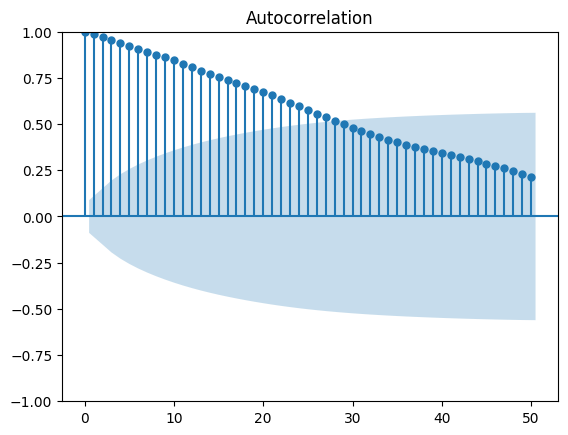

In [ ]:
acf_plot = plot_acf(closepriceseries.Close, lags=50) #clearly has more correlation w price just the day b4


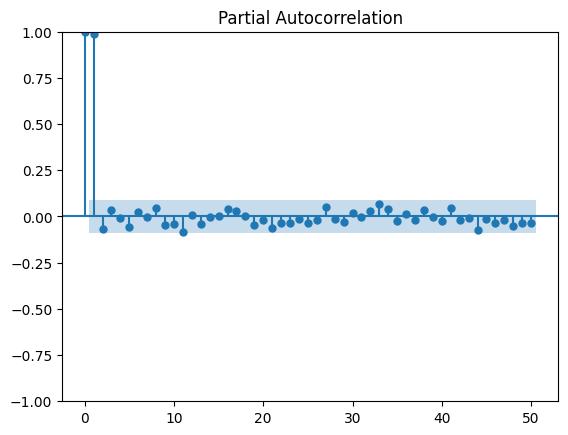

In [ ]:
pacf_plot = plot_pacf(closepriceseries.Close, lags=50) #same

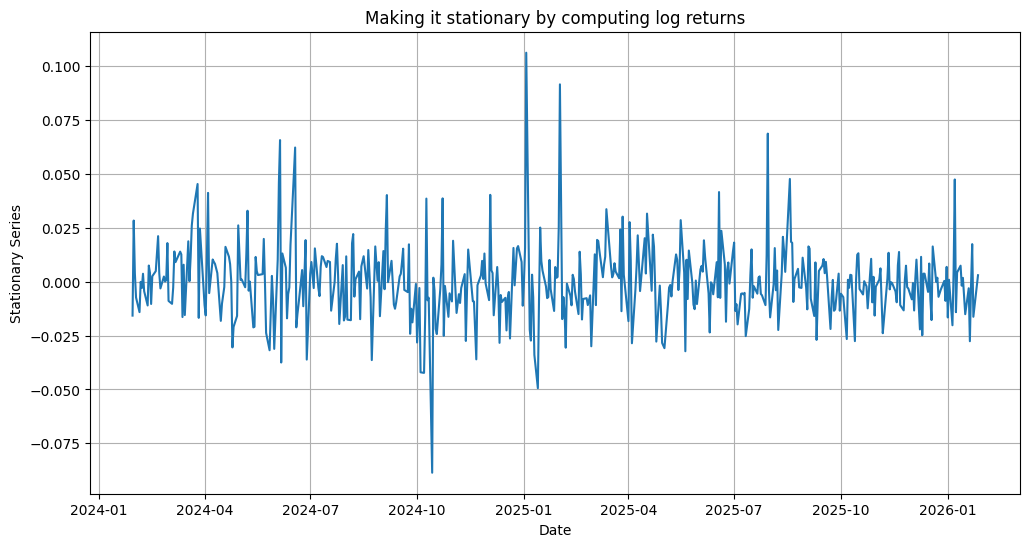

In [ ]:
end_date_ii = closepriceseries['Date'].max()
start_date_ii = end_date_ii - pd.DateOffset(years=2)

dmart_2y = closepriceseries[(closepriceseries['Date'] >= start_date_ii) & (closepriceseries['Date'] <= end_date_ii)]

# Plot
plt.figure(figsize=(12, 6))
plt.plot(dmart_2y['Date'], dmart_2y['log_returns'])
plt.xlabel('Date')
plt.ylabel('Stationary Series')
plt.title('Making it stationary by computing log returns')
plt.grid(True)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller
                                                                         #-20 vs -3 means it is very precise
adfuller(closepriceseries['log_returns'].dropna())

(np.float64(-20.14308630304307),
 0.0,
 0,
 489,
 {'1%': np.float64(-3.4437936797256317),
  '5%': np.float64(-2.867468682890213),
  '10%': np.float64(-2.5699277594606915)},
 np.float64(-2460.4932233087357))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(closepriceseries.log_returns, order=(1, 0, 0))
fit = model.fit()
print(fit.summary())

                               SARIMAX Results                                
Dep. Variable:            log_returns   No. Observations:                  490
Model:                 ARIMA(1, 0, 0)   Log Likelihood                1287.764
Date:                Tue, 27 Jan 2026   AIC                          -2569.529
Time:                        17:26:08   BIC                          -2556.946
Sample:                             0   HQIC                         -2564.587
                                - 490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.394e-05      0.001     -0.048      0.962      -0.002       0.002
ar.L1          0.0918      0.039      2.365      0.018       0.016       0.168
sigma2         0.0003   1.11e-05     27.508      0.0

In [ ]:
forecast_res = fit.get_forecast(steps=7) #for a week

In [ ]:
forecast_res.conf_int()

,lower log_returns,upper log_returns
490,-0.034014,0.034482
491,-0.034410,0.034374
492,-0.034435,0.034352
493,-0.034437,0.034349
494,-0.034437,0.034349
495,-0.034437,0.034349
496,-0.034437,0.034349


In [ ]:
mean_log_returns = forecast_res.predicted_mean

In [ ]:
mean_log_returns

,predicted_mean
490,0.000234
491,-0.000018
492,-0.000042
493,-0.000044
494,-0.000044
495,-0.000044
496,-0.000044


In [ ]:
conf_int = forecast_res.conf_int()

In [ ]:
conf_int

,lower log_returns,upper log_returns
490,-0.034014,0.034482
491,-0.034410,0.034374
492,-0.034435,0.034352
493,-0.034437,0.034349
494,-0.034437,0.034349
495,-0.034437,0.034349
496,-0.034437,0.034349


In [ ]:
conf_int.columns

Index(['lower log_returns', 'upper log_returns'], dtype='object')

In [ ]:
last_price = closepriceseries['Close'].iloc[-1]

In [ ]:
final_perdayaddn_df = np.cumsum(mean_log_returns)

In [ ]:
final_perdayaddn_df

,predicted_mean
490,0.000234
491,0.000216
492,0.000174
493,0.000131
494,0.000087
495,0.000043
496,-0.000001


In [ ]:
forecast_prices = last_price * np.exp(final_perdayaddn_df)


In [ ]:
forecast_prices = forecast_prices.drop(
    index=["lowerbound", "lower_bound"],
    errors="ignore"
)

In [ ]:
conf_int['final_lower_multipliers'] = np.cumsum(conf_int['lower log_returns'])
conf_int['final_upper_multipliers'] = np.cumsum(conf_int['upper log_returns'])
conf_int.drop(columns = ['final_multipliers'])

,lower log_returns,upper log_returns,final_lower_multipliers,final_upper_multipliers
490,-0.034014,0.034482,-0.034014,0.034482
491,-0.034410,0.034374,-0.068424,0.068856
492,-0.034435,0.034352,-0.102859,0.103208
493,-0.034437,0.034349,-0.137296,0.137557
494,-0.034437,0.034349,-0.171733,0.171906
495,-0.034437,0.034349,-0.206170,0.206256
496,-0.034437,0.034349,-0.240607,0.240605


In [ ]:
forecast_prices

,predicted_mean
490,3671.660462
491,3671.592957
492,3671.440259
493,3671.279746
494,3671.118522
495,3670.957239
496,3670.795958


In [ ]:
forecast_prices = forecast_prices.to_frame(name="predicted_mean")

In [ ]:
forecast_prices

,predicted_mean
490,3671.660462
491,3671.592957
492,3671.440259
493,3671.279746
494,3671.118522
495,3670.957239
496,3670.795958


In [ ]:
forecast_prices['lower_price_bound'] = last_price*np.exp(conf_int['final_lower_multipliers'])
forecast_prices['upper_price_bound'] = last_price*np.exp(conf_int['final_upper_multipliers'])
forecast_prices

,predicted_mean,lower_price_bound,upper_price_bound
490,3671.660462,3548.042489,3799.585431
491,3671.592957,3428.029702,3932.461505
492,3671.440259,3311.995490,4069.894906
493,3671.279746,3199.882032,4212.122460
494,3671.118522,3091.563090,4359.319480
495,3670.957239,2986.910791,4511.660373
496,3670.795958,2885.801064,4669.324968


In [ ]:
closepriceseries.columns

Index(['Date', 'Close', 'log_returns', 'SMA_10', 'CMA', 'EMA'], dtype='object', name='Price')

In [ ]:
closepriceseries['Date'] = pd.to_datetime(closepriceseries['Date'])
closepriceseries.set_index('Date', inplace=True)

In [ ]:
last_date = closepriceseries.Close.index[-1]

forecast_dates = pd.bdate_range(
    start=last_date,
    periods=len(forecast_prices) + 1,
    freq="B"
)[1:]

forecast_prices = forecast_prices.copy()
forecast_prices.index = forecast_dates


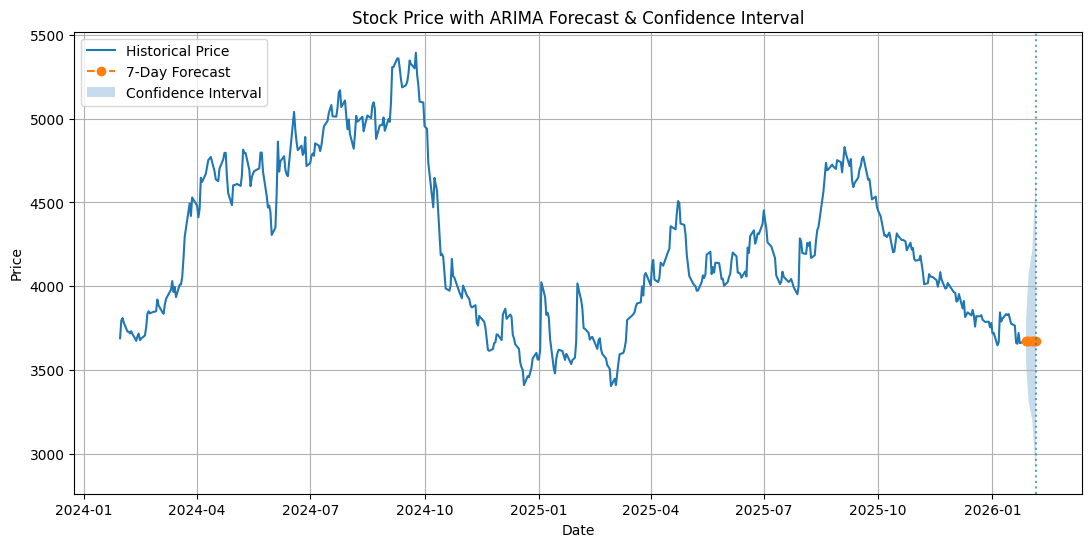

In [ ]:


plt.figure(figsize=(13, 6))

# Historical prices
plt.plot(
    closepriceseries.index,
    closepriceseries['Close'].values,
    label="Historical Price"
)

# Forecast mean
plt.plot(
    forecast_prices.index,
    forecast_prices["predicted_mean"],
    linestyle="--",
    marker="o",
    label="7-Day Forecast"
)

# Confidence interval
plt.fill_between(
    forecast_prices.index,
    forecast_prices["lower_price_bound"],
    forecast_prices["upper_price_bound"],
    alpha=0.25,
    label="Confidence Interval"
)

# Visual separator (optional but nice)
plt.axvline(
    forecast_prices.index[-1],
    linestyle=":",
    alpha=0.7
)

plt.legend()
plt.title("Stock Price with ARIMA Forecast & Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


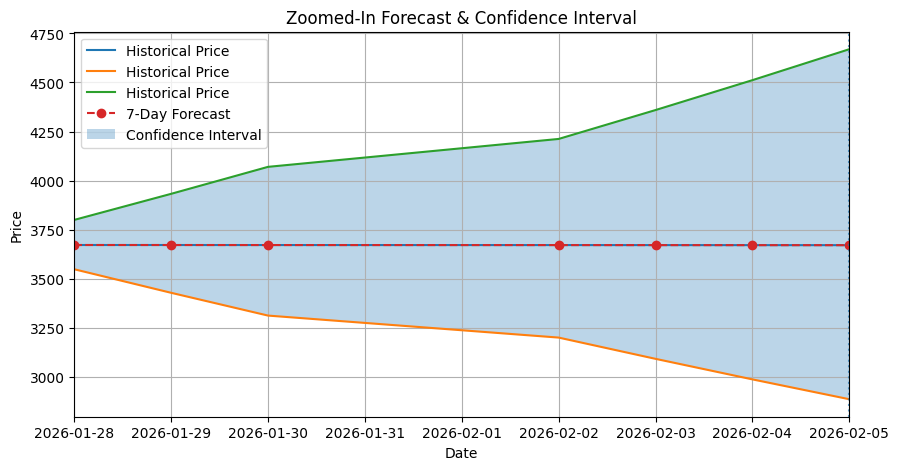

In [ ]:
# Zoom window
zoom_start = forecast_prices.index[-7]   # last 20 trading days
zoom_end   = forecast_prices.index[-1]      # end of forecast

plt.figure(figsize=(10, 5))

plt.plot(forecast_prices.index, forecast_prices, label="Historical Price")
plt.plot(
    forecast_prices.index,
    forecast_prices["predicted_mean"],
    linestyle="--",
    marker="o",
    label="7-Day Forecast"
)

plt.fill_between(
    forecast_prices.index,
    forecast_prices["lower_price_bound"],
    forecast_prices["upper_price_bound"],
    alpha=0.3,
    label="Confidence Interval"
)

plt.axvline(forecast_prices.index[-1], linestyle=":", alpha=0.7)

# 🔑 THIS IS THE ZOOM
plt.xlim(zoom_start, zoom_end)

plt.legend()
plt.title("Zoomed-In Forecast & Confidence Interval")
plt.xlabel("Date")
plt.ylabel("Price")
plt.grid(True)
plt.show()


In [ ]:
forecast_prices

,predicted_mean,lower_price_bound,upper_price_bound
2026-01-28,3671.660462,3548.042489,3799.585431
2026-01-29,3671.592957,3428.029702,3932.461505
2026-01-30,3671.440259,3311.995490,4069.894906
2026-02-02,3671.279746,3199.882032,4212.122460
2026-02-03,3671.118522,3091.563090,4359.319480
2026-02-04,3670.957239,2986.910791,4511.660373
2026-02-05,3670.795958,2885.801064,4669.324968


In [ ]:
closepriceseries.Close

,Close
Date,
2024-01-30,3688.699951
2024-01-31,3794.800049
2024-02-01,3809.350098
2024-02-02,3781.500000
2024-02-05,3728.449951
...,...
2026-01-20,3661.600098
2026-01-21,3655.699951
2026-01-22,3719.949951
